In [862]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
print(train_data.shape)
print(test_data.shape)
from scipy import stats
import seaborn as sns
import math

(1460, 81)
(1459, 80)


In [863]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [864]:
test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [865]:
train_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [866]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [867]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [868]:
train_data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [869]:
null_columns=train_data.columns[train_data.isnull().any()]
total = train_data[null_columns].isnull().sum().sort_values(ascending=False)
percent = total/1460
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [870]:
train_data = train_data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
train_data.isnull().sum().max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


0

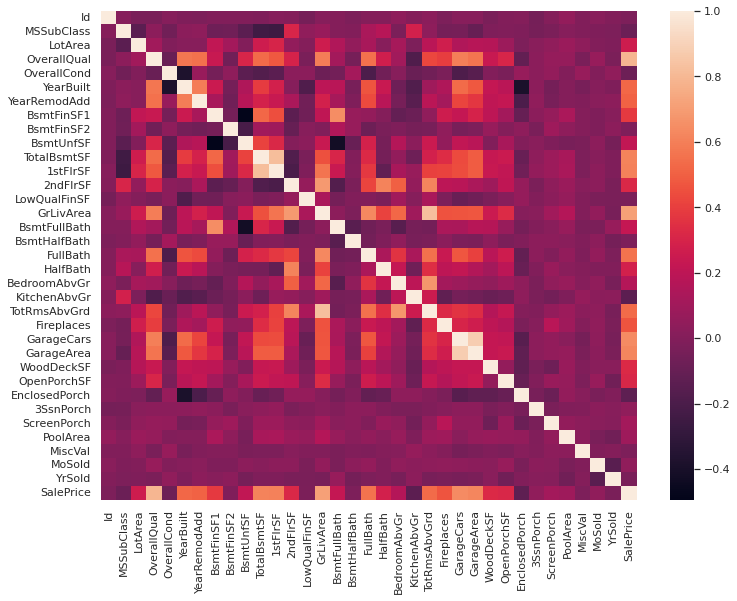

In [871]:
corr = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


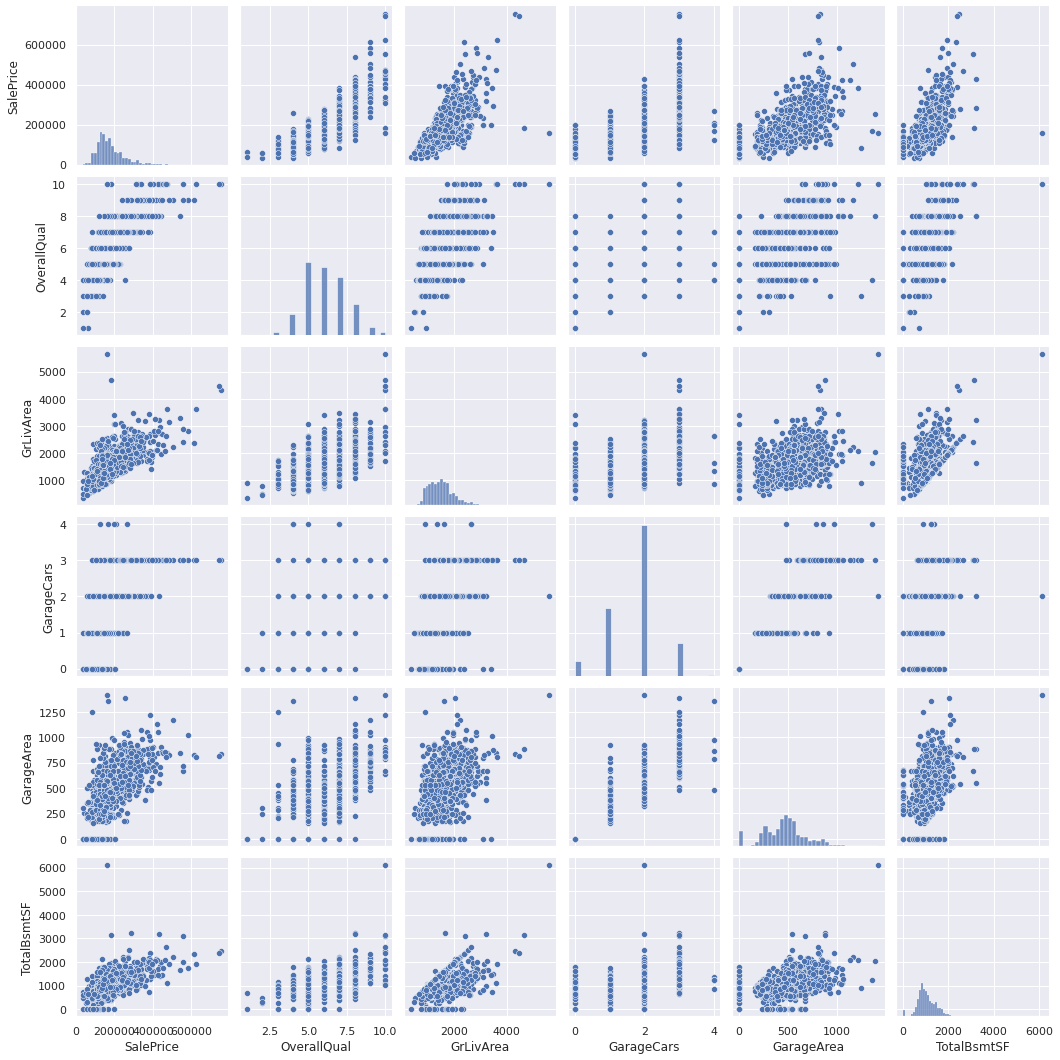

In [872]:
corr_cols = corr.nlargest(6, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(train_data[corr_cols], size = 2.5)
plt.show()

(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

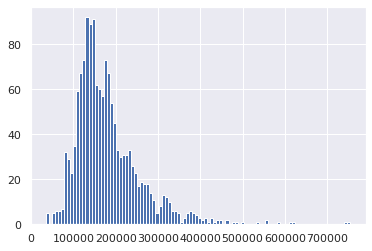

In [873]:
plt.hist(train_data['SalePrice'], 100)

We can see that the Sale price is not distributed well in the middle, we can consider make a log or square root transfermation. 

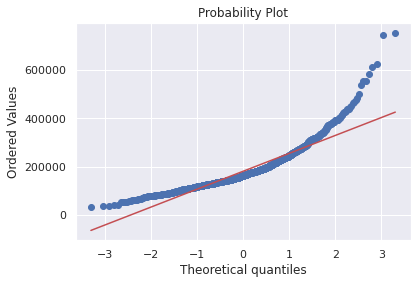

In [874]:
res = stats.probplot(train_data['SalePrice'], plot=plt)

We can check the skewness(balance between left and right of distribution) and kurtosis(balance between up and down of distribution).

And see which transformation is better for this data.

In [875]:
print("Skewness : %f" % train_data['SalePrice'].skew())
print("Kurtosis : %f" % train_data['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


From this picture and the output, we conclude that the SalePrice is lean to the left. And for this case we decide to use the log transfermation. 

In [876]:
# Apply log transformation for SalePrice. 
train_data['SalePrice'] = np.log(train_data['SalePrice'])

Now we check if the transformation is good. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


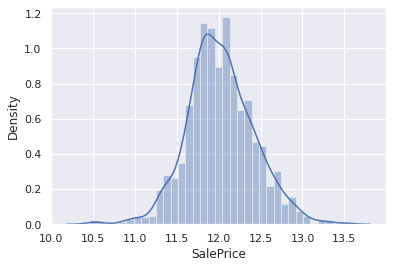

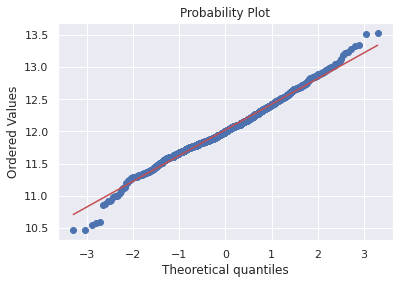

In [877]:
sns.distplot(train_data['SalePrice'], norm_hist=True)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot=plt)

For 'GrLivArea', the scakter plot is not so good, and the crorelation with the sale price is high, so we check if we can make it better fir the normal distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


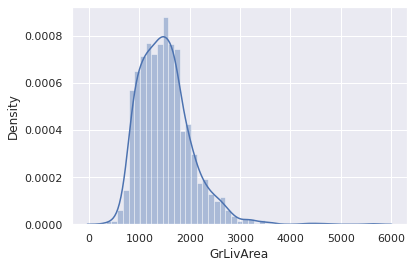

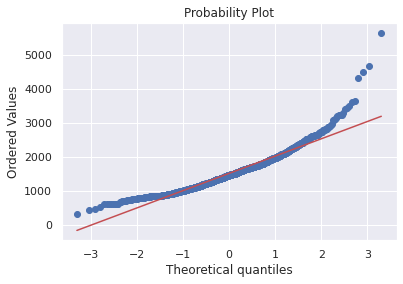

In [878]:
sns.distplot(train_data['GrLivArea'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

From the plots, we can conclude that if could also use log transformation to make it close to normal distribution. 

In [879]:
#log transformation

train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

Here is the distribution of the transformed data. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


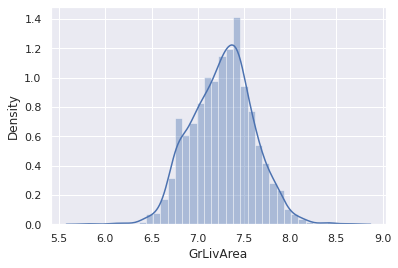

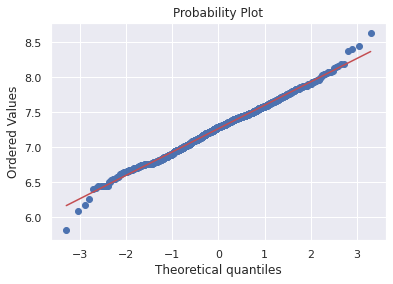

In [880]:
sns.distplot(train_data['GrLivArea'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

Then we can check the 'TotalBsmtSF', for now we can see that for every feature that relatated to the "squarefeet", we make a log transformation. 

Next, we check the ''TotalBsmtSF''. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


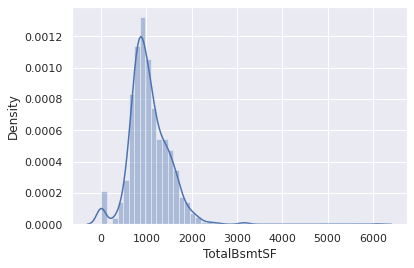

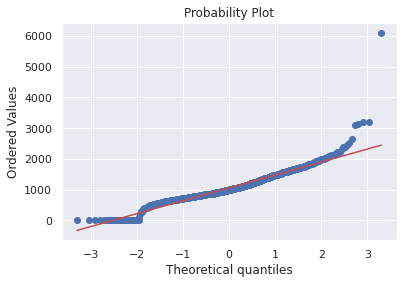

In [881]:
sns.distplot(train_data['TotalBsmtSF'], norm_hist=True);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

The plot seems not good for log transformation, since their are extrme residual and distribution. The reason would be some house doesn't has basement. But, when explore the data, we see that if the house doesn't have basement, then the 'TotalBsmtSF' = 0, so we can still try log transformation and see if the model would complain for that. 

In [882]:
train_data['TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])
for i in range(len(train_data['TotalBsmtSF'])):
  if train_data['TotalBsmtSF'][i] < 0:
    train_data['TotalBsmtSF'][i] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [883]:
train_data['TotalBsmtSF'].head(50)

0     6.752270
1     7.140453
2     6.824374
3     6.628041
4     7.043160
5     6.679599
6     7.430114
7     7.009409
8     6.858565
9     6.898715
10    6.946976
11    7.069023
12    6.815640
13    7.309212
14    7.133296
15    6.723832
16    6.911747
17    0.000000
18    7.015712
19    6.936343
20    7.054450
21    6.456770
22    7.482682
23    6.946976
24    6.966024
25    7.356280
26    6.802395
27    7.440734
28    7.302496
29    6.253829
30    6.475433
31    7.113142
32    7.118016
33    7.242798
34    7.353082
35    7.018402
36    7.000334
37    7.167809
38    6.963190
39    0.000000
40    6.992096
41    7.207860
42    6.733402
43    6.843750
44    7.047517
45    7.468513
46    7.268223
47    7.412160
48    6.601230
49    6.861711
Name: TotalBsmtSF, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


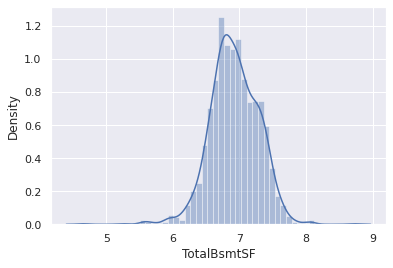

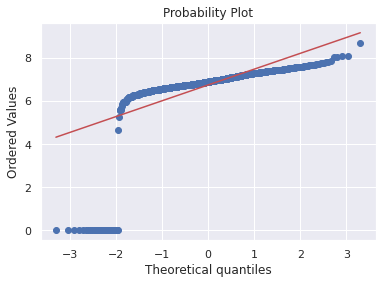

In [884]:
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], norm_hist=True)
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

Set up data for XGB

In [885]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 
        'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 
        'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
for col in cols:
  encoder = LabelEncoder()
  train_data[col] = encoder.fit_transform(train_data[col])

Train the XGB model

In [886]:
X = train_data.copy()
y = X.pop("SalePrice")

model = XGBRegressor()

model.fit(X, y)

[00:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Get predictions from XGB model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


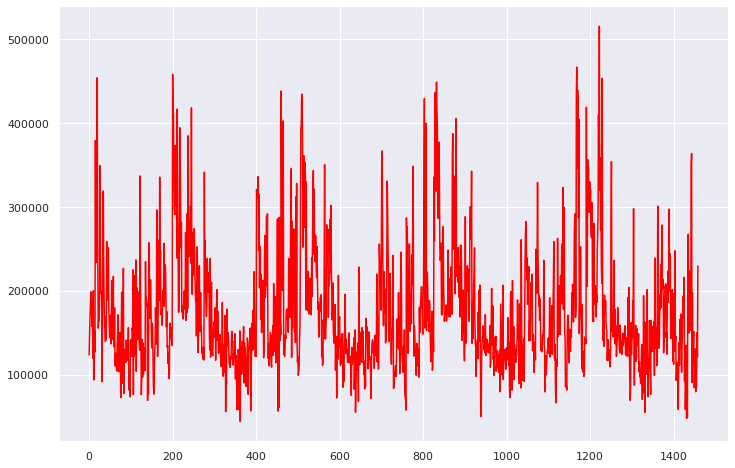

In [887]:
test_data = test_data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
test_data['GrLivArea'] = np.log(test_data['GrLivArea'])
test_data['TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])
for i in range(len(test_data['TotalBsmtSF'])):
  if test_data['TotalBsmtSF'][i] < 0:
    test_data['TotalBsmtSF'][i] = 0
Rf_test = test_data.copy()
for col in cols:
  encoder = LabelEncoder()
  test_data[col] = encoder.fit_transform(test_data[col])
predictions = model.predict(test_data)
final_pred = np.exp(predictions)
final_pred
plt.figure(figsize=(12,8))
plt.plot(final_pred, color='red')
plt.show()


In [888]:
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': final_pred})
output.to_csv('my_submission.csv', index=False)

In [889]:
from sklearn.metrics import mean_absolute_error
predicted_home_prices = model.predict(X)
mean_absolute_error(np.exp(y), np.exp(predicted_home_prices))

11634.048656892128

In [890]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
print(mean_absolute_error(np.exp(val_y), np.exp(val_predictions)))


[00:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
16910.30500856165


Lets' try Random forest model to see if it will perform better or not

In [891]:
rel_vars = corr.SalePrice[(corr.SalePrice > 0)]
rel_cols = list(rel_vars.index.values)
X_rf = train_data[rel_cols[:-1]].iloc[:,0:].values
y_rf = train_data['SalePrice'].values
test_rf = test_data[rel_cols[:-1]].iloc[:,0:].values

In [892]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.1, random_state = 0)
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train_rf, y_train_rf)
rf_pred = regressor.predict(X_test_rf)
print(mean_absolute_error(np.exp(y_test_rf), np.exp(rf_pred)))

16539.379268524575
